<a href="https://www.kaggle.com/code/iqmansingh/crab-age-voting-regression-synthetic-data?scriptVersionId=133133525" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
print("Setup Complete")

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv
/kaggle/input/synthetic-crab-age-dataset/syn_crab_data (2).csv
/kaggle/input/synthetic-crab-age-dataset/syn_crab_data.csv
Setup Complete


In [2]:
crab_train = pd.read_csv('../input/playground-series-s3e16/train.csv')
crab_test = pd.read_csv('../input/playground-series-s3e16/test.csv')
syn_train = pd.read_csv('../input/synthetic-crab-age-dataset/syn_crab_data.csv')
syn_train_new = pd.read_csv('../input/synthetic-crab-age-dataset/syn_crab_data (2).csv')

In [3]:
print(crab_train.info(),crab_test.info(),syn_train.info(),syn_train_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 

In [4]:
crab_train = crab_train.append(syn_train)
crab_train = crab_train.append(syn_train_new)

/tmp/ipykernel_23/2751418337.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crab_train = crab_train.append(syn_train)
/tmp/ipykernel_23/2751418337.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crab_train = crab_train.append(syn_train_new)


In [5]:
crab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274051 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              274051 non-null  int64  
 1   Sex             274051 non-null  object 
 2   Length          274051 non-null  float64
 3   Diameter        274051 non-null  float64
 4   Height          274051 non-null  float64
 5   Weight          274051 non-null  float64
 6   Shucked Weight  274051 non-null  float64
 7   Viscera Weight  274051 non-null  float64
 8   Shell Weight    274051 non-null  float64
 9   Age             274051 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 23.0+ MB


In [6]:
train_dup = crab_train[crab_train.duplicated()]
train_dup.shape

(0, 10)

In [7]:
sexVals = crab_train['Sex'].unique()

In [8]:
for i in sexVals:
    if(i=="M" or i=="F" or i=="I"):
        continue
    else:
        count = (crab_train['Sex'] == i).sum()
        crab_train['Sex'].replace(to_replace=i, method='ffill',inplace=True)
        print(f'Count of {i} in Column Sex was: ', count)

dummy = []
col = ['Sex']
for i in col:
    dummy.append(pd.get_dummies(crab_train[i]))
crab_dummy = pd.concat(dummy, axis=1)
crab_train = pd.concat((crab_train,crab_dummy), axis=1)

dummy = []
for i in col:
    dummy.append(pd.get_dummies(crab_test[i]))
crab_dummy = pd.concat(dummy, axis=1)
crab_test = pd.concat((crab_test,crab_dummy), axis=1)

Count of 1 in Column Sex was:  1
Count of 0.0 in Column Sex was:  1


In [9]:
crab_train.drop(col,axis=1,inplace=True)
crab_test.drop(col,axis=1,inplace=True)

In [10]:
crab_train.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,F,I,M
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0,0,1,0
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0,0,1,0
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0,0,0,1
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0,1,0,0
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0,0,1,0


In [11]:
crab_test.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,F,I,M
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0


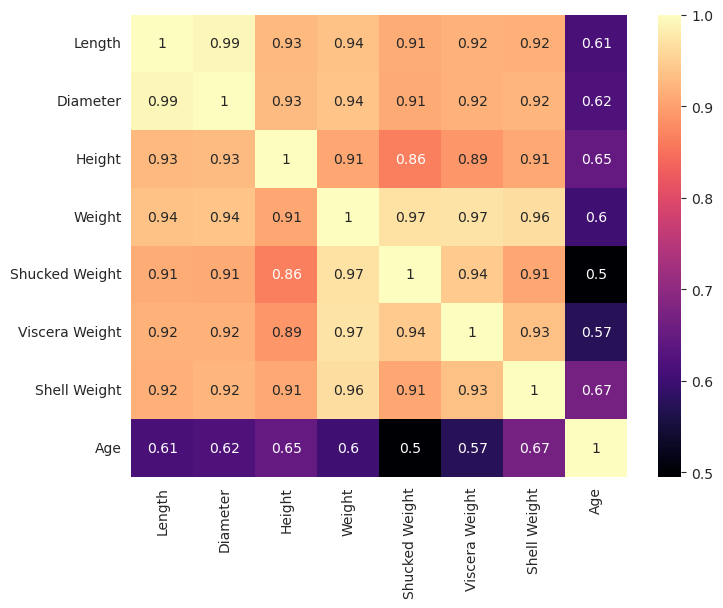

In [12]:
features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight','Age']
corr = crab_train[features].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = 'magma', annot = True);

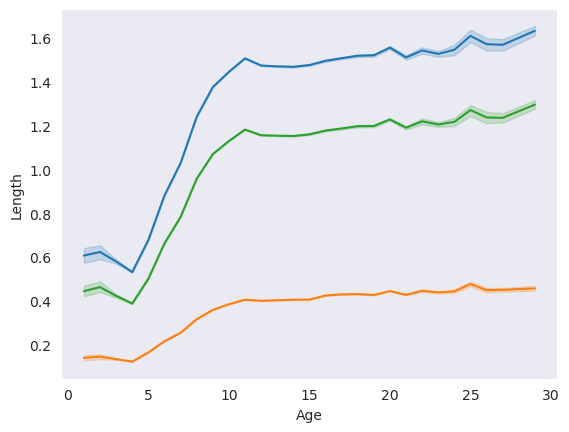

In [13]:
sns.lineplot(data=crab_train,x="Age",y="Length")
sns.lineplot(data=crab_train,x="Age",y="Height")
sns.lineplot(data=crab_train,x="Age",y="Diameter");

In [14]:
for i in crab_train.columns:
    count = (crab_train[i] == 0).sum()
    print(i,count)

id 3
Length 3
Diameter 19
Height 149
Weight 0
Shucked Weight 0
Viscera Weight 0
Shell Weight 0
Age 0
F 189668
I 184334
M 174100


In [15]:
crab_train['Height'].replace(to_replace=0, value=np.NaN,inplace=True)
crab_train['Length'].replace(to_replace=0, value=np.NaN,inplace=True)
crab_train['Diameter'].replace(to_replace=0, value=np.NaN,inplace=True)
crab_train.dropna(inplace=True)
crab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273880 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              273880 non-null  int64  
 1   Length          273880 non-null  float64
 2   Diameter        273880 non-null  float64
 3   Height          273880 non-null  float64
 4   Weight          273880 non-null  float64
 5   Shucked Weight  273880 non-null  float64
 6   Viscera Weight  273880 non-null  float64
 7   Shell Weight    273880 non-null  float64
 8   Age             273880 non-null  float64
 9   F               273880 non-null  uint8  
 10  I               273880 non-null  uint8  
 11  M               273880 non-null  uint8  
dtypes: float64(8), int64(1), uint8(3)
memory usage: 21.7 MB


In [16]:
crab_train['Shell Weight']=np.where(crab_train['Shell Weight']>crab_train['Weight'],crab_train['Weight'],crab_train['Shell Weight'])
crab_train['Viscera Weight']=np.where(crab_train['Viscera Weight']>crab_train['Weight'],crab_train['Weight'],crab_train['Viscera Weight'])
crab_train['Shucked Weight']=np.where(crab_train['Shucked Weight']>crab_train['Weight'],crab_train['Weight'],crab_train['Shucked Weight'])

crab_train['Top Area'] = crab_train['Length'] * crab_train['Diameter']
crab_train["Length Diameter Ratio"]=crab_train['Length']/crab_train['Diameter']
crab_train['Shell Shuck Ratio']=crab_train["Shell Weight"]/crab_train["Shucked Weight"]
# crab_train['Density'] = crab_train['Weight']/(crab_train['Top Area'] * crab_train['Height'])
# crab_train["Height Length Ratio"]=crab_test['Height']/crab_test['Length']


crab_test['Top Area'] = crab_test['Length'] * crab_test['Diameter']
crab_test["Length Diameter Ratio"]=crab_test['Length']/crab_test['Diameter']
crab_test['Shell Shuck Ratio']=crab_test["Shell Weight"]/crab_test["Shucked Weight"]
# crab_test['Density'] = crab_test['Weight']/(crab_test['Top Area'] * crab_test['Height'])
# crab_test["Height Length Ratio"]=crab_test['Height']/crab_test['Length']


In [17]:
crab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273880 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     273880 non-null  int64  
 1   Length                 273880 non-null  float64
 2   Diameter               273880 non-null  float64
 3   Height                 273880 non-null  float64
 4   Weight                 273880 non-null  float64
 5   Shucked Weight         273880 non-null  float64
 6   Viscera Weight         273880 non-null  float64
 7   Shell Weight           273880 non-null  float64
 8   Age                    273880 non-null  float64
 9   F                      273880 non-null  uint8  
 10  I                      273880 non-null  uint8  
 11  M                      273880 non-null  uint8  
 12  Top Area               273880 non-null  float64
 13  Length Diameter Ratio  273880 non-null  float64
 14  Shell Shuck Ratio      273880 non-nu

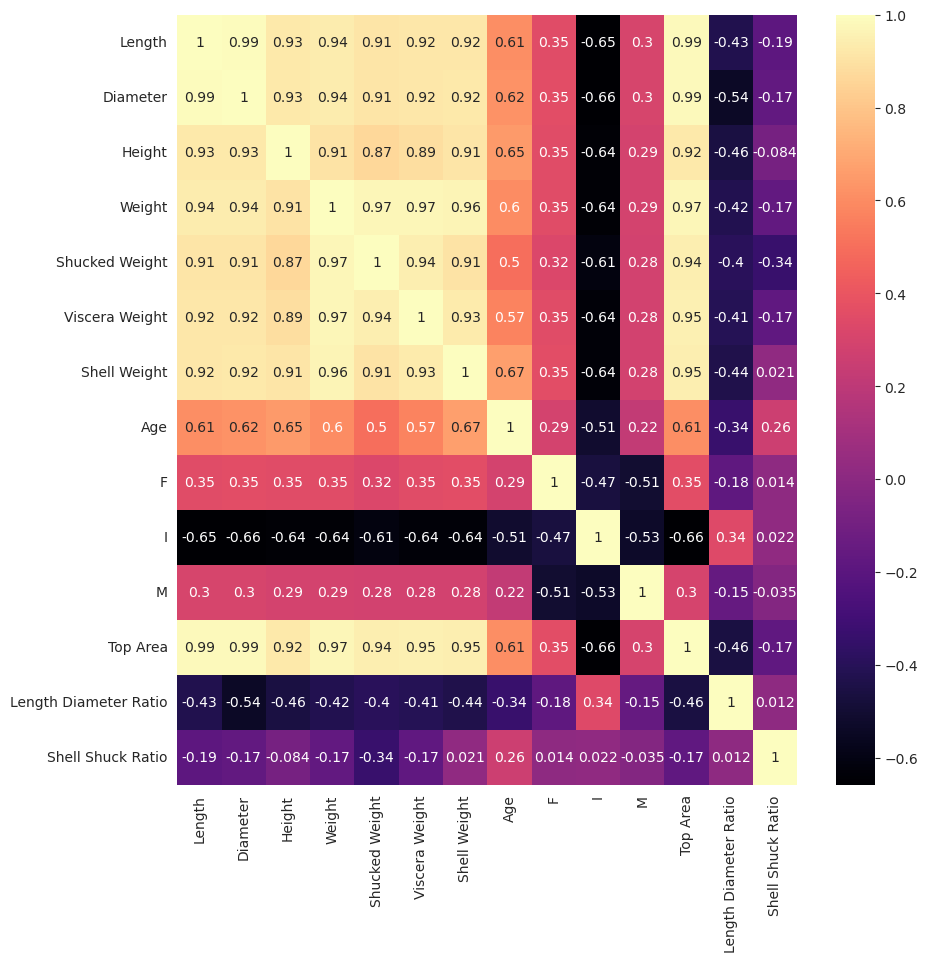

In [18]:
features=[i for i in crab_train.columns if i!="id"]
corr = crab_train[features].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'magma', annot = True);

# **Models**

In [19]:
crab_train.columns

Index(['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'F', 'I', 'M', 'Top Area',
       'Length Diameter Ratio', 'Shell Shuck Ratio'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, ensemble
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor, HuberRegressor
from sklearn.linear_model import BayesianRidge
# cols = ['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
#        'Viscera Weight', 'Shell Weight', 'F', 'I', 'M', 'Top Area',
#        'Length Diameter Ratio','Shell Shuck Ratio']
cols = [i for i in crab_train.columns if i!="Age"]
X_train, X_test, y_train, y_test = train_test_split(crab_train[cols], crab_train.Age, test_size=0.3,random_state=100)
seed = np.random.seed(0)

In [21]:
crab_train.columns
crab_train_y = crab_train["Age"] # Full training data
crab_train_x = crab_train[cols]  # Full training data

# crab_train_x = X_train
# crab_train_y = y_train

In [22]:
rfmodel = RandomForestRegressor(max_depth= 8,min_samples_leaf= 10,random_state=seed)
rfmodel.fit(crab_train_x,crab_train_y)
print("MAE of RF:",mean_absolute_error(y_test, rfmodel.predict(X_test)))

MAE of RF: 1.40531729253484


In [23]:
brmodel = BayesianRidge(verbose=False,tol=0.01,compute_score=True,)
brmodel.fit(crab_train_x,crab_train_y)
print("MAE of BR:",mean_absolute_error(y_test, brmodel.predict(X_test)))

MAE of BR: 1.4696263930572098


In [24]:
gbmodel = GradientBoostingRegressor(max_depth= 8,loss='absolute_error',random_state=seed)
gbmodel.fit(crab_train_x, crab_train_y)
print("MAE of GB:",mean_absolute_error(y_test, gbmodel.predict(X_test)))

MAE of GB: 1.3162906685486329


In [25]:
hbmodel = HuberRegressor(max_iter = 100000,epsilon=1.7)
hbmodel.fit(crab_train_x,crab_train_y)
print("MAE of HB:",mean_absolute_error(y_test, hbmodel.predict(X_test)))

MAE of HB: 2.853699759703532


In [26]:
xgbmodel = XGBRegressor(max_depth= 6,random_state=seed,learning_rate = 0.01,n_estimators= 1000,
                        objective='reg:absoluteerror',tree_method='gpu_hist')
xgbmodel.fit(crab_train_x, crab_train_y)
print("MAE of XGB:",mean_absolute_error(y_test, xgbmodel.predict(X_test)))

MAE of XGB: 1.361029597331809


In [27]:
catmodel = CatBoostRegressor(random_state=seed, iterations = 1100,verbose=False,max_depth=12,task_type="GPU",loss_function='MAE',)
catmodel.fit(crab_train_x, crab_train_y)
print("MAE of CAT:",mean_absolute_error(y_test, catmodel.predict(X_test)))

Default metric period is 5 because MAE is/are not implemented for GPU


MAE of CAT: 1.3505416170819813


In [28]:
lgbmodel = LGBMRegressor(max_depth= 8,random_state=seed,learning_rate=0.075)
lgbmodel.fit(crab_train_x, crab_train_y)
print("MAE of LGB:",mean_absolute_error(y_test, lgbmodel.predict(X_test)))

MAE of LGB: 1.3881868004745854


In [29]:
hgbmodel = HistGradientBoostingRegressor(random_state = seed, loss = 'absolute_error',max_iter=10000,warm_start=True,early_stopping=True)
hgbmodel.fit(crab_train_x,crab_train_y)
print("MAE of HGB:",mean_absolute_error(y_test, hgbmodel.predict(X_test)))

MAE of HGB: 1.3665121264631555


In [30]:
import random
# gb, xgb, hgb, lgb, rf, cat
w1 = [random.uniform(0.7,1) for i in range(4)]
w2 = [random.uniform(0.5,0.8) for i in range(2)]
w1.extend(w2)
w1

[0.9212949676428768,
 0.9813893782653786,
 0.9367997605706847,
 0.8463078418516982,
 0.5344180017517705,
 0.7463994191817985]

In [31]:
vrmodel = VotingRegressor([('gb', gbmodel),('xgb', xgbmodel),('hgb',hgbmodel), ('lgb', lgbmodel),('rf',rfmodel),('cat',catmodel)],weights=w1)
vrmodel.fit(crab_train_x, crab_train_y)
print("MAE of VR:",mean_absolute_error(y_test, vrmodel.predict(X_test)))

Default metric period is 5 because MAE is/are not implemented for GPU


MAE of VR: 1.3490533440200922


In [32]:
crab_test.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,F,I,M,Top Area,Length Diameter Ratio,Shell Shuck Ratio
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0,0.800625,1.377049,0.744186
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0,1.031719,1.309859,0.564516
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0,1.271406,1.303797,0.867347
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0,1.530625,1.569620,0.525424
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0,0.945625,1.308824,0.602564


In [33]:
# predictions = vrmodel.predict(crab_test)
# predictions = hgbmodel.predict(crab_test)
# predictions = catmodel.predict(crab_test)
# predictions = lgbmodel.predict(crab_test)
predictions = gbmodel.predict(crab_test)

In [34]:
# crab_submission = crab_test
crab_test['Age'] = predictions
crab_test.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,F,I,M,Top Area,Length Diameter Ratio,Shell Shuck Ratio,Age
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0,0.800625,1.377049,0.744186,7.543799
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0,1.031719,1.309859,0.564516,7.933600
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0,1.271406,1.303797,0.867347,10.506254
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0,1.530625,1.569620,0.525424,9.287312
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0,0.945625,1.308824,0.602564,7.771925


In [35]:
colsToDrop = [i for i in crab_test.columns if (i != "id" and i!="Age")]

In [36]:
crab_submission = crab_test.drop(colsToDrop,axis = 1)
crab_test.drop(["Age"],axis = 1,inplace=True)

In [37]:
crab_submission.head()

,id,Age
0,74051,7.543799
1,74052,7.933600
2,74053,10.506254
3,74054,9.287312
4,74055,7.771925


In [38]:
crab_submission.to_csv('submission_gb.csv',header=True,index=False)